## Importing libraries and reading data

In [1]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SMOTENC

beans = pd.read_csv("Dry_Bean_Dataset.csv", sep=",")

beans = beans.sample(frac=1).reset_index()
beans

,index,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,9835,51052,848.581,311.005178,209.539906,1.484229,0.738959,51644,254.953771,0.712718,0.988537,0.890914,0.819773,0.006092,0.001697,0.672028,0.997444,SIRA
1,8086,41608,760.435,288.469788,184.841706,1.560631,0.767736,42168,230.167224,0.762890,0.986720,0.904196,0.797890,0.006933,0.001733,0.636629,0.993543,SIRA
2,12754,35724,704.414,260.626197,174.951617,1.489704,0.741209,36149,213.272618,0.752449,0.988243,0.904720,0.818308,0.007296,0.002018,0.669629,0.997549,DERMASON
3,9152,46411,807.342,307.584525,192.419462,1.598510,0.780158,46925,243.089121,0.793350,0.989046,0.894779,0.790316,0.006627,0.001595,0.624600,0.998430,SIRA
4,10583,26951,605.502,225.199335,152.739618,1.474400,0.734839,27309,185.243297,0.793377,0.986891,0.923748,0.822575,0.008356,0.002360,0.676629,0.997622,DERMASON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,5674,43693,817.646,328.284872,170.724279,1.922895,0.854136,44262,235.863637,0.802914,0.987145,0.821280,0.718472,0.007513,0.001235,0.516203,0.992604,HOROZ
13607,5919,48216,862.090,355.384690,173.897886,2.043640,0.872103,48852,247.771100,0.634772,0.986981,0.815259,0.697191,0.007371,0.001074,0.486076,0.993364,HOROZ
13608,815,38187,732.350,252.536864,192.800540,1.309835,0.645861,38625,220.502151,0.788287,0.988660,0.894722,0.873148,0.006613,0.002371,0.762388,0.998602,SEKER
13609,3718,184246,1642.028,646.577540,365.205365,1.770449,0.825208,186178,484.344189,0.754946,0.989623,0.858711,0.749089,0.003509,0.000682,0.561134,0.993460,BOMBAY


## Useful functions to be defined

In [2]:
# Defining functions to evaluate predictions

def get_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


## Scaling features

In [3]:
scaler = StandardScaler()
beans1=beans.loc[:, beans.columns != 'Class']
scaler.fit(beans1)
new_beans=pd.DataFrame(scaler.transform(beans1))
d = new_beans.set_axis(beans1.columns, axis=1, inplace=False)
d['Class']=beans['Class']

## Splitting data set in train set and test set

In [4]:
X = d.drop('Class', axis=1) # non target
y = d['Class'] # target

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)

## Performing a Grid Search (with cross-validation) for parameter tuning of Logistic Regression

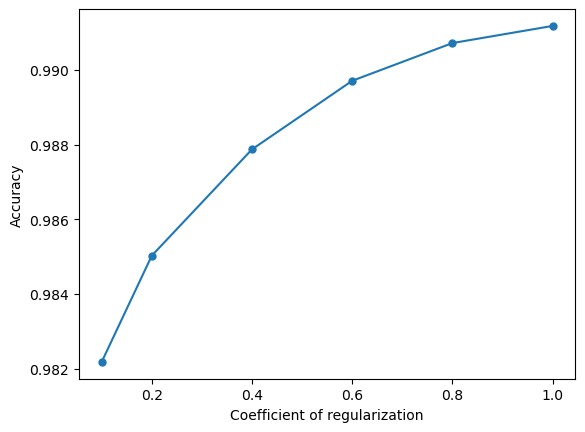

In [5]:
from sklearn.linear_model import LogisticRegression

a = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

param_grid = dict(C=a)

clf = LogisticRegression(solver='newton-cg')

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['C']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['C', 'Accuracy']

fig = plt.gcf()

plt.plot(grid_reset['C'],grid_reset['Accuracy'], marker='o', markersize=5)
plt.xlabel('Coefficient of regularization')
plt.ylabel('Accuracy')

plt.show()
plt.draw()
fig.savefig('TUNEbeansLR.png', dpi=600)

## Logistic Regression and hold-out evaluation / Confusion matrix

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.99      0.98       265
      BOMBAY       1.00      1.00      1.00        93
        CALI       0.99      0.97      0.98       360
    DERMASON       1.00      1.00      1.00       661
       HOROZ       0.99      0.99      0.99       408
       SEKER       0.99      0.98      0.99       426
        SIRA       0.99      1.00      0.99       510

    accuracy                           0.99      2723
   macro avg       0.99      0.99      0.99      2723
weighted avg       0.99      0.99      0.99      2723

score:  0.9908189496878443


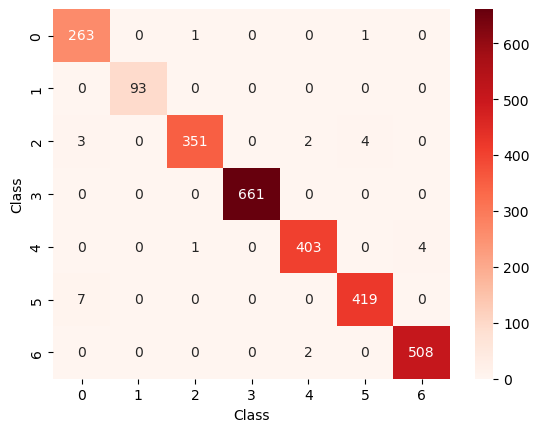

In [6]:
LR = LogisticRegression(solver='newton-cg')

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", LR.score(X_test, y_test))
M = confusion_matrix(y_test, y_pred)

fig = plt.gcf()

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('Class')
plt.ylabel('Class')

plt.show()
plt.draw()
fig.savefig('CMbeansLR.png', dpi=100)

## Performing a Grid Search (with cross-validation) for parameter tuning of k-NN

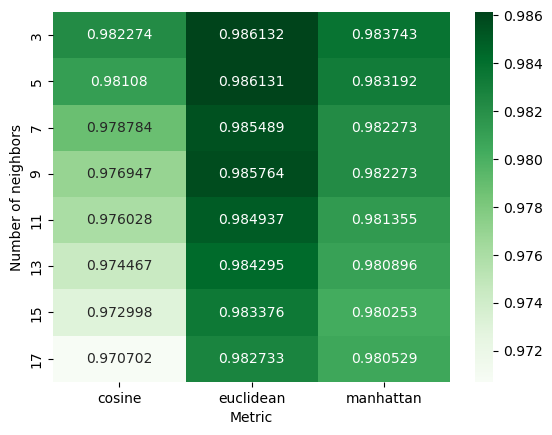

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#a = ['uniform', 'distance']
a = ['manhattan', 'euclidean', 'cosine']
b = [3,5,7,9,11,13,15,17]
param_grid = dict(metric=a, n_neighbors=b)

clf = KNeighborsClassifier()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['n_neighbors','metric']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['Number of neighbors','Metric', 'Accuracy']
grid_pivot = grid_reset.pivot('Number of neighbors','Metric')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values


fig = plt.gcf()

sns.heatmap(grid_pivot['Accuracy'],annot=True,cmap='Greens', fmt='g')

plt.show()
plt.draw()

fig.savefig('TUNEbeanskNN.png', dpi=100)

## Hold-out with best parameters of k-NN / Confusion matrix

In [ ]:
kNN = KNeighborsClassifier()

kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)

#evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", kNN.score(X_test, y_test))
M = confusion_matrix(y_test, y_pred)

fig = plt.gcf()

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('Class')
plt.ylabel('Class')

plt.show()
plt.draw()
fig.savefig('CMbeanskNN.png', dpi=100)

## Performing a Grid Search (with cross-validation) for parameter tuning of SVC

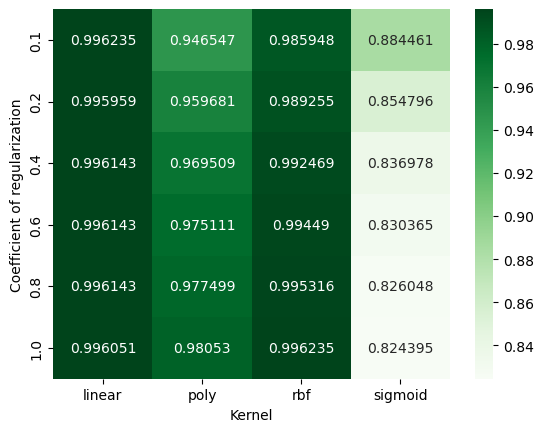

In [16]:
from sklearn.svm import SVC

c = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
kernels = ['linear','rbf', 'sigmoid','poly']
param_grid = dict(C=c, kernel=kernels)

clf = SVC()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['C','kernel']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['Coefficient of regularization', 'Kernel', 'Accuracy']
grid_pivot = grid_reset.pivot('Coefficient of regularization', 'Kernel')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

fig = plt.gcf()

sns.heatmap(grid_pivot['Accuracy'],annot=True,cmap='Greens', fmt='g')

plt.show()
plt.draw()

fig.savefig('TUNEbeansSVM.png', dpi=600)

## Hold-out with best parameters of SVC / Confusion matrix

In [ ]:
from sklearn.model_selection import StratifiedKFold

svm = SVC(kernel='linear', C=1.0)

# Hold out

#y_train =y_train.astype('int') 
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", svm.score(X_test, y_test))
M = confusion_matrix(y_test, y_pred)

fig = plt.gcf()

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('Class')
plt.ylabel('Class')

plt.show()
plt.draw()
fig.savefig('CMbeansSVM.png', dpi=100)